# Лабораторная работа №6. 
## Логинов Сергей
### Вариант 1

1. Считаем из заданного набора данных (Annealing Data Set) репозитария UCI значения.

In [10]:
import pandas as pd
import numpy as np
url = \
"https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data"
data_set = pd.read_csv( url, header=None )
np.unique(data_set.isna())

array([False])

2. Произведем препроцессинг данных. Пропущенных данных в классе нет. Выберем только числовые признаки.

In [11]:
import numpy as np
data_setX = data_set.loc[:, 0:37]
data_setY = data_set.loc[:, 38]
data_setX = data_set[[3, 4,8,32,33, 34]]
data_setX = data_setX.replace('?',np.NaN)
data_setX = data_setX.fillna(data_setX.median());
display(data_setX)
display(data_setY)

,3,4,8,32,33,34
0,8,0,0,0.700,610.0,0
1,0,0,0,3.200,610.0,0
2,0,0,0,0.700,1300.0,762
3,0,60,0,2.801,385.1,0
4,0,60,0,0.801,255.0,269
...,...,...,...,...,...,...
793,0,50,0,1.001,50.0,0
794,0,0,0,0.699,1300.0,4880
795,0,0,0,0.400,609.9,0
796,0,0,0,3.200,610.0,4880


0      3
1      3
2      3
3      3
4      3
      ..
793    3
794    3
795    3
796    3
797    2
Name: 38, Length: 798, dtype: object

3. Вычислим и визуализируем матрицу корреляций признаков. Удалим из набора признаки, имеющие высокую корреляцию (близкую к +1 или -1) с другими признаками.

In [12]:
corr = np.corrcoef( data_setX.T )
corr

array([[ 1.        , -0.12469249, -0.0697731 ,  0.18035542, -0.00705755,
        -0.13509306],
       [-0.12469249,  1.        , -0.12756093,  0.02508289, -0.01540611,
        -0.10762963],
       [-0.0697731 , -0.12756093,  1.        ,  0.0954058 ,  0.06157636,
        -0.04203002],
       [ 0.18035542,  0.02508289,  0.0954058 ,  1.        ,  0.02664746,
        -0.08713514],
       [-0.00705755, -0.01540611,  0.06157636,  0.02664746,  1.        ,
         0.1299241 ],
       [-0.13509306, -0.10762963, -0.04203002, -0.08713514,  0.1299241 ,
         1.        ]])

4. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек. Сопоставить по количеству точек не выходит, так как класс 3 доминирует над всеми остальными.

In [13]:
data_setY = data_setY.replace('U', 6)
data_setY = data_setY.astype('int')
for i in range(len(data_setY)):
    if int(data_setY[i]) == 3: 
        data_setY[i] = 0
    else:
        data_setY[i] = 1
data_setY.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

5. Используя метод рекурсивного исключения признаков (RFE) и логистическую регрессию, определим и оставим в наборе наиболее значимые признаки. В данном случае это признаки 4, 5,33. Определим признаки с наибольшей дисперсией и оставим только их. В данном случае это признаки 4 и 5.

In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
rfe = RFE(model)
fit = rfe.fit(data_setX, data_setY)

In [15]:
print("Число признаков: %d" % fit.n_features_)
print("Выбранные признаки: %s" % fit.support_)
print("Ранг признаков: %s" % fit.ranking_)

Число признаков: 3
Выбранные признаки: [ True  True False  True False False]
Ранг признаков: [1 1 2 1 3 4]


In [16]:
data_setX = data_setX[[3,4,32]]
data_setX.std()

3     13.592644
4     24.621001
32     0.861608
dtype: float64

In [17]:
data_setX = data_setX[[3,4]]
data_setX = data_setX.rename(columns = {3: "carbon", 4: "hardness"})
data_setX

,carbon,hardness
0,8,0
1,0,0
2,0,0
3,0,60
4,0,60
...,...,...
793,0,50
794,0,0
795,0,0
796,0,0


6. Масштабируем признаки набора данных на интервал от 0 до 1.

In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(data_setX)
Y = data_setY.values

7. Разделим набор данных на обучающую и тестовую выборки в соотношении 70% на 30%.

In [19]:
from sklearn.model_selection import train_test_split
test_size=0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

8. По порядку задания создадим и обучим классификаторы. Построим графики.

In [20]:
import matplotlib.pyplot as plt
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid( # сетка (решетка) на плокости
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    # метод ravel() возвращает 1d массив, функция c_ конвертирует 1d массивы в 2d
    X_new = np.c_[x0.ravel(), x1.ravel()] 

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap # объект Colormap из списка
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])  
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
ax = [0, 1, 0,1]

- наивный байесовский классификатор

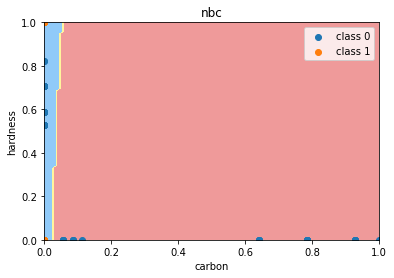

In [21]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,Y_train);

plot_decision_boundary(nbc, axis=ax)
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], label="class 0")
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1], label="class 1");
plt.legend()
plt.title("nbc")
plt.xlabel("carbon")
plt.ylabel("hardness");

- логистическая регрессия

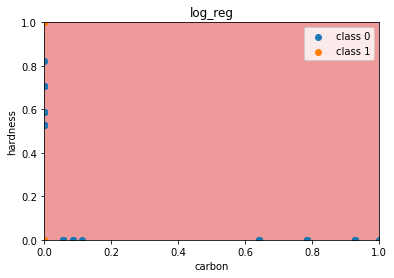

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train);
plot_decision_boundary(log_reg, axis=ax)
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], label="class 0")
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1], label="class 1");
plt.legend()
plt.title("log_reg")
plt.xlabel("carbon")
plt.ylabel("hardness");

- логистическая регрессия с полиномиальными зависимостями (degree равно 2 и 3)

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('log_reg', LogisticRegression())
    ])

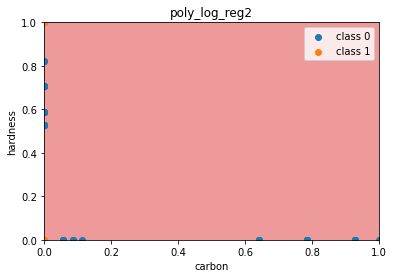

In [24]:
poly_log_reg2 = PolynomialLogisticRegression(degree=2)
poly_log_reg2.fit(X_train, Y_train);
poly_log_reg3 = PolynomialLogisticRegression(degree=3)
poly_log_reg3.fit(X_train, Y_train);

plot_decision_boundary(poly_log_reg2, axis=ax)
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], label="class 0")
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1], label="class 1");
plt.legend()
plt.title("poly_log_reg2")
plt.xlabel("carbon")
plt.ylabel("hardness");

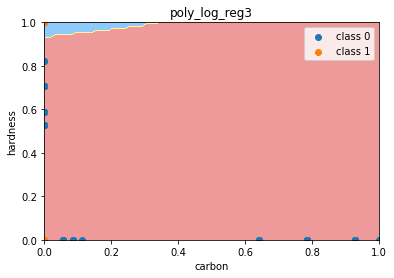

In [25]:
plot_decision_boundary(poly_log_reg3, axis=ax)
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], label="class 0")
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1], label="class 1");
plt.legend()
plt.title("poly_log_reg3")
plt.xlabel("carbon")
plt.ylabel("hardness");

- линейный дискриминантный анализ

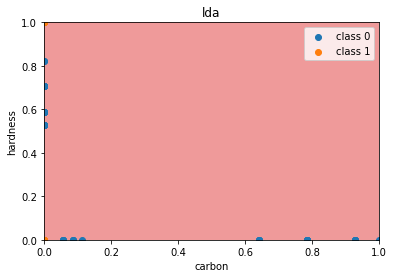

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train);

plot_decision_boundary(lda, axis=ax)
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], label="class 0")
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1], label="class 1");
plt.legend()
plt.title("lda")
plt.xlabel("carbon")
plt.ylabel("hardness");

- метода опорных векторов

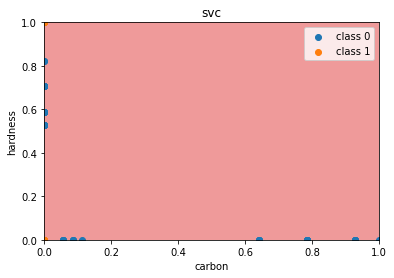

In [27]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, Y_train);

plot_decision_boundary(svc, axis=ax)
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], label="class 0")
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1], label="class 1");
plt.legend()
plt.title("svc")
plt.xlabel("carbon")
plt.ylabel("hardness");

- метода опорных векторов с полиномиальными зависимостями (degree равно 2 и 3).

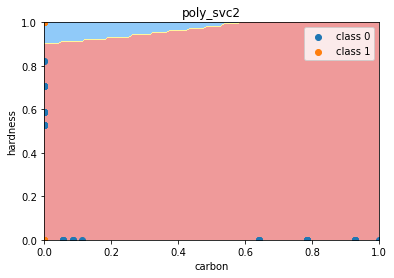

In [28]:
def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("linearSVC", LinearSVC(C=C))
    ])
poly_svc2 = PolynomialSVC(degree=2)
poly_svc2.fit(X_train, Y_train)
poly_svc3 = PolynomialSVC(degree=3)
poly_svc3.fit(X_train, Y_train);

plot_decision_boundary(poly_svc2, axis=ax)
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], label="class 0")
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1], label="class 1");
plt.legend()
plt.title("poly_svc2")
plt.xlabel("carbon")
plt.ylabel("hardness");

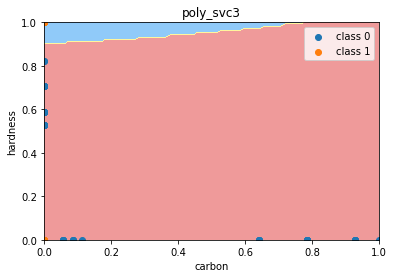

In [29]:
plot_decision_boundary(poly_svc3, axis=ax)
plt.scatter(X_test[Y_test==0,0], X_test[Y_test==0,1], label="class 0")
plt.scatter(X_test[Y_test==1,0], X_test[Y_test==1,1], label="class 1");
plt.legend()
plt.title("poly_svc3")
plt.xlabel("carbon")
plt.ylabel("hardness");

9. Визуализируем на одном рисунке ROC кривые для каждого из классификаторов, подписывая оси и рисунок и создавая легенду для методов бинарной классификации.

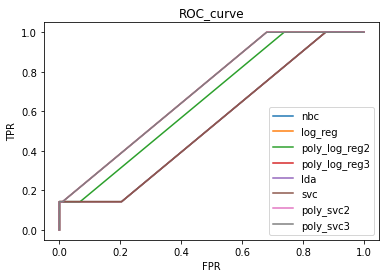

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

scores = {}


Y_nbc_score = nbc.predict_proba(X_test)
fprs, tprs, thresholds = roc_curve(Y_test, Y_nbc_score[:, 1])
plt.plot(fprs, tprs, label="nbc")
scores["nbc"] = roc_auc_score(Y_test, Y_nbc_score[:, 1])

decision_scores = log_reg.decision_function(X_test)
fprs, tprs, thresholds = roc_curve(Y_test, decision_scores)
plt.plot(fprs, tprs, label="log_reg")
scores["log_reg"] = roc_auc_score(Y_test, decision_scores)


decision_scores = poly_log_reg2.decision_function(X_test)
fprs, tprs, thresholds = roc_curve(Y_test, decision_scores)
plt.plot(fprs, tprs, label="poly_log_reg2")
scores["poly_log_reg2"] = roc_auc_score(Y_test, decision_scores)


decision_scores = poly_log_reg3.decision_function(X_test)
fprs, tprs, thresholds = roc_curve(Y_test, decision_scores)
plt.plot(fprs, tprs, label="poly_log_reg3")
scores["poly_log_reg3"] = roc_auc_score(Y_test, decision_scores)

decision_scores = lda.decision_function(X_test)
fprs, tprs, thresholds = roc_curve(Y_test, decision_scores)
plt.plot(fprs, tprs, label="lda")
scores["lda"] = roc_auc_score(Y_test, decision_scores)



decision_scores = svc.decision_function(X_test)
fprs, tprs, thresholds = roc_curve(Y_test, decision_scores)
plt.plot(fprs, tprs, label="svc")
scores["svc"] = roc_auc_score(Y_test, decision_scores)


decision_scores = poly_svc2.decision_function(X_test)
fprs, tprs, thresholds = roc_curve(Y_test, decision_scores)
plt.plot(fprs, tprs, label="poly_svc2")
scores["poly_svc2"] = roc_auc_score(Y_test, decision_scores)


decision_scores = poly_svc3.decision_function(X_test)
fprs, tprs, thresholds = roc_curve(Y_test, decision_scores)
plt.plot(fprs, tprs, label="poly_svc3")
scores["poly_svc3"] = roc_auc_score(Y_test, decision_scores)


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_curve")
plt.legend();

10. Определим лучший метод бинарной классификации набора данных по показателю ROC_AUC.

In [31]:
scores

{'nbc': 0.537771129394166,
 'log_reg': 0.537771129394166,
 'poly_log_reg2': 0.6544502617801048,
 'poly_log_reg3': 0.7038145100972326,
 'lda': 0.537771129394166,
 'svc': 0.537771129394166,
 'poly_svc2': 0.7038145100972326,
 'poly_svc3': 0.7038145100972325}

In [32]:
k = max(scores, key=scores.get)
print("Максимальное значение ROC_AUC: {} = {}".format(k, scores[k]))

Максимальное значение ROC_AUC: poly_log_reg3 = 0.7038145100972326
